In [38]:
# load data
%pylab
%matplotlib inline
import pandas as pd
from google.colab import files
uploaded = files.upload()

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Saving University statistics - Cleaned Data.csv to University statistics - Cleaned Data (1).csv


In [39]:
import io
my_data = pd.read_csv(io.BytesIO(uploaded['University statistics - Cleaned Data.csv']),
                    header=0, index_col='School')
# Rows with Overseas Chinese student number --> Country total + uni specifics
chinese = my_data[my_data['Overseas Chinese student number'].notnull()].drop(columns=['System', 'Date', 'Total student number'])
chinese['Overseas Chinese student number'] = chinese['Overseas Chinese student number'].astype(int)
chinese['Domestic Chinese student number'] = chinese['Domestic Chinese student number'].astype(int)
chinese.head()

,Country,2020 QS Ranking,2020 QS Score,2020 THE Ranking,2020 THE Score,2019 ARWU Ranking,2019 ARWU Score,Overseas Chinese student number,Domestic Chinese student number
School,,,,,,,,,
US Total,US,NaN,NaN,NaN,NaN,NaN,NaN,282276,309000
Stanford,US,2.0,98.4,4,94.3,2,75.1,1255,190
MIT,US,1.0,100.0,5,93.6,4,69.0,839,130
Yale,US,17.0,87.7,8,91.7,11,50.8,799,150
NYU,US,39.0,78.8,29,81.1,30,38.1,5632,530


In [0]:
# sorted by overseas chinese
overseas_s = chinese.sort_values(by='Overseas Chinese student number', ascending=False)

num_of_country = 4

# separate country total from uni
country_o_s = overseas_s.iloc[:num_of_country]
uni_o_s = overseas_s.iloc[num_of_country:]

In [0]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Overseas Chinese student number



## By country

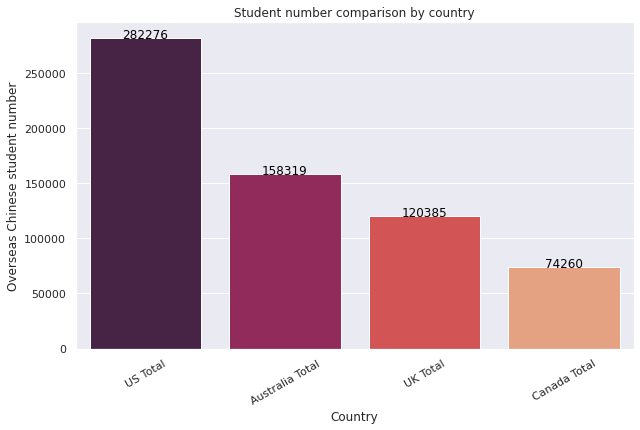

In [50]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Student number comparison by country")

x=country_o_s.index
y=country_o_s['Overseas Chinese student number']
g = sns.barplot(x=x, y=y, palette="rocket")

plt.ylabel("Overseas Chinese student number")
plt.xlabel("Country")
plt.xticks(rotation=30)

for i, v in enumerate(y):
    g.text(i, v+1, str(v), color='black', ha='center')

## By university

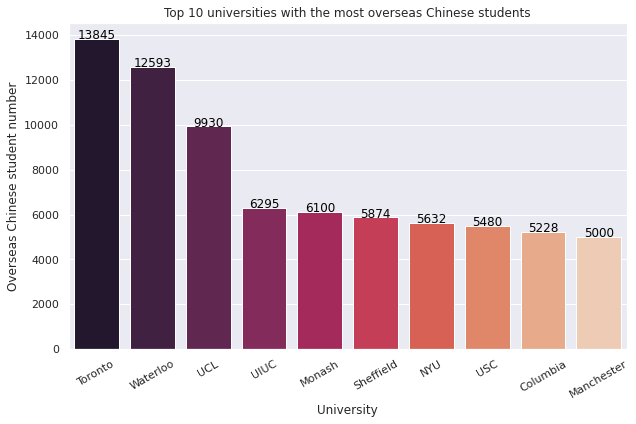

In [51]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Top 10 universities with the most overseas Chinese students")

# Bar chart showing top 10 universities with the most overseas Chinese students
x=uni_o_s.index[:10]
y=uni_o_s['Overseas Chinese student number'][:10]
g = sns.barplot(x=x, y=y, palette="rocket")

plt.ylabel("Overseas Chinese student number")
plt.xlabel("University")
plt.xticks(rotation=30)

for i, v in enumerate(y):
    g.text(i, v+1, str(v), color='black', ha='center')

Text(0, 0.5, 'Overseas Chinese student number')

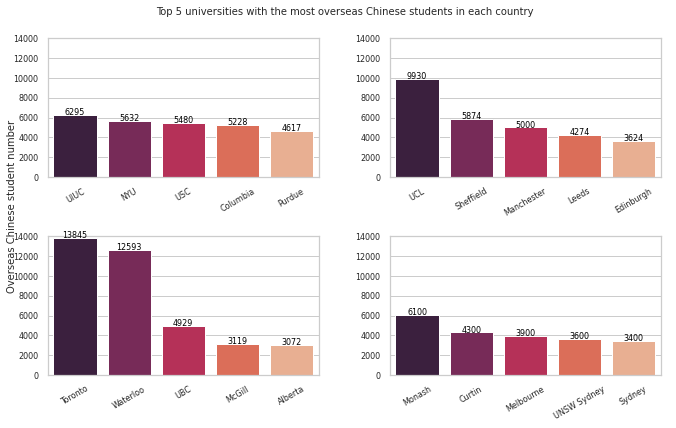

In [59]:
f, axes = plt.subplots(2, 2, figsize=(10,6))
f.tight_layout(pad=3.0)

plt.suptitle("Top 5 universities with the most overseas Chinese students in each country", fontsize=10)

country_list = ['US', 'UK', 'Canada', 'Australia']

for id, country in enumerate(country_list):

  temp_uni_o_s = uni_o_s[uni_o_s['Country']==country]

  x=temp_uni_o_s.index[:5]
  y=temp_uni_o_s['Overseas Chinese student number'][:5]
  g = sns.barplot(x=x, y=y, palette="rocket", ax=axes[id // 2, id % 2])

  axes[id // 2, id % 2].set_xticklabels(labels=x, rotation=30)
  axes[id // 2, id % 2].set(ylim=(0, 14000))
  axes[id // 2, id % 2].tick_params(labelsize=8)
  axes[id // 2, id % 2].set_ylabel('')    
  axes[id // 2, id % 2].set_xlabel('')


  for i, v in enumerate(y):
      g.text(i, v+1, str(v), color='black', ha='center', fontsize=8)

# To add a common y label
sns.set_style('white')
f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Overseas Chinese student number", fontsize=10)

Text(0.5, 1.0, 'Categorical scatter plot by country')

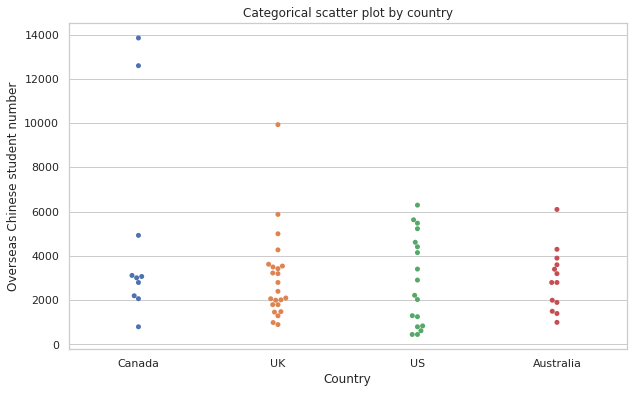

In [53]:
# Categorical scatter plot
sns.set(style="whitegrid", rc={'figure.figsize':(10,6)})
sns.swarmplot(x=uni_o_s['Country'],
              y=uni_o_s['Overseas Chinese student number'])
plt.title('Categorical scatter plot by country')

# Unstudied overseas Chinese students


Assume students cannot enroll in more than one university simultaneously.

We look at how many of them are not included in this study.

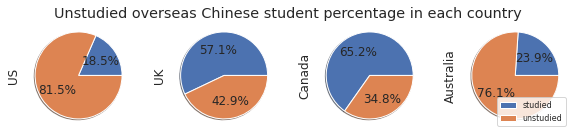

In [58]:
country_list = ['US', 'UK', 'Canada', 'Australia']

df = pd.DataFrame()

for id, country in enumerate(country_list):

  temp_uni_o_s = uni_o_s[uni_o_s['Country']==country]

  studied = temp_uni_o_s['Overseas Chinese student number'].sum()
  unstudied = country_o_s[country_o_s['Country']==country]['Overseas Chinese student number'].sum() - studied

  temp = pd.DataFrame({country: [studied, unstudied]},
                  index=['studied', 'unstudied'])
  
  df = pd.concat([df, temp], axis=1)

g = df.plot.pie(subplots=True, labels=None, legend=None,
                figsize=(10, 2), shadow=True, autopct='%1.1f%%',
                title="Unstudied overseas Chinese student percentage in each country")

plt.legend(df.index, loc='lower right', fontsize=8)